#Modulo III - INGENIERIA DE CARACTERÍSTICAS

<font size="4">
<p>En éste módulo se estudiará la importancia de las características escogidas para entrenar o para agrupar los ejemplos según sea nuestro problema de machine learning.
</p>

<p>
Se empezará por hacer un breve recorrido de lo que se conoce como analisis exploratorio de nuestros datos en donde podemos ver gráficamente la correlación entre las características y otros comportamiento fácilmente observables.
Seguidamente se darán las bases para entender los métodos de reducción de dimensionalidad como son análisis de componentes principales (en español ACP, en inglés, PCA) y Latent Dirichlet Allocation (LDA) .
</p>

<p>
El recorrido por éstos métodos se hará como a lo largo de todo el curso de una manera práctica que permita usar inmediatamente los conceptos adquiridos.
</p>
<br>

</font>

## 1. Análisis Exploratorio

<font size="4">
<p>
Hacer un análsis previo de los datos es fundamental, y en algunos casos determinante.
<p>
<p>
Una gráfica facilita la visualización de relaciones entre variables, ya sea que crecen proporcinalmente o no.
</p>
<p>Cuando observamos los datos podemos hacer hipotesis de su comportamiento, y más adelante con alguna técnica estadística que respaldar nuestros presupuestos.
</p>
<p>
En ésta sección se hará uso de la librería python seaborn library para el analsis exploratorio con un caso de uso de credir scoring.
</p>
<p>
Con el uso de ésta librería así como con pandas y numpy, vamos a ver que es posible producir gráficas estadísticas reveladoras con un mínimo de código. 
</p>
</font>



### 1.1 Credit Scoring

<img src="imgs/credit-score.jpg" width="20%" height="20%"/>
<font size="4">
<p>Este dataset de credit scoring fue elaborado por el profesor Professor Dr. Hans Hofmann [REF] el cual contiene ejemplos 
de personas catalogadas con alto y bajo riesgo en la petición de un crédito financiero.
</p>
https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)


### Paso 1. Leer Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
Data = pd.read_csv("datasets/german_credit_data.csv")
print (Data.columns)
Data.head(5)

Index(['Client id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Class'],
      dtype='object')


Client id  Age     Sex  Job Housing Saving accounts Checking account  \
0          0   67    male    2     own             NaN           little   
1          1   22  female    2     own          little         moderate   
2          2   49    male    1     own          little              NaN   
3          3   45    male    2    free          little           little   
4          4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose Class  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

Se puede observar que hay variables que no son numéricas, sino que categóricas. Por ejemplo Purpose, que se refiere a la intención del crédito.

In [3]:
print("Purpose : ",Data.Purpose.unique())

('Purpose : ', array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object))


En muchos datasets vas a encontrar datos nulos que en python tiene el formato de NAN, para evitar errores de procesamiento eliminamos los registros que tengan datos NAN.

In [4]:
Data = Data.dropna()

In [5]:
Data.head(5)

Client id  Age     Sex  Job Housing Saving accounts Checking account  \
1          1   22  female    2     own          little         moderate   
3          3   45    male    2    free          little           little   
4          4   53    male    2    free          little           little   
7          7   35    male    3    rent          little         moderate   
9          9   28    male    3     own          little         moderate   

   Credit amount  Duration              Purpose Class  
1           5951        48             radio/TV   bad  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
7           6948        36                  car  good  
9           5234        30                  car   bad

Las variables categoricas es necesario volverlas numéricas para más adelante procesarlas por alguno de los métodos de ML.

In [3]:
Data_proc = pd.DataFrame(Data)
Data_proc['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data_proc['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data_proc['Checking account'] = Data['Checking account'].map({"little":0,"moderate":1,"rich":2 })
Data_proc['Sex'] = Data['Sex'].map({"male":0,"female":1});
Data_proc['Housing'] = Data['Housing'].map({"own":0,"free":1,"rent":2});
Data_proc['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7});
Data_proc['Class'] = Data['Class'].map({'bad':0, 'good':1});

In [4]:
Data_proc.head(5)

Client id  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0          0   67    0    2        0              NaN               0.0   
1          1   22    1    2        0              0.0               1.0   
2          2   49    0    1        0              0.0               NaN   
3          3   45    0    2        1              0.0               0.0   
4          4   53    0    2        1              0.0               0.0   

   Credit amount  Duration  Purpose  Class  
0           1169         6        0      1  
1           5951        48        0      0  
2           2096        12        1      1  
3           7882        42        2      1  
4           4870        24        3      0

Veamos cómo está distribuida el tipo de vivienda de los usaurios (propia, renta, gratis)

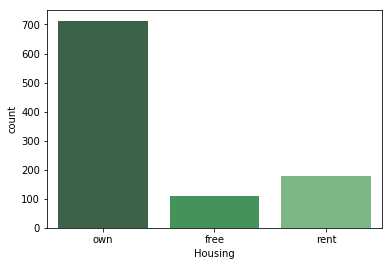

In [5]:
sns.countplot(x="Housing", data=Data, palette="Greens_d");

Vamos a ver que relación hay entre el tipo de vivienda y la edad.

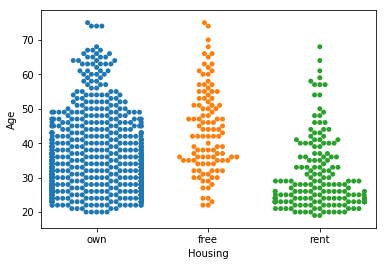

In [6]:
sns.swarmplot(x="Housing", y="Age", data=Data);

Ya que información en la gráfica de puntos puede ser limitado, intentemos graficar la distribución de los datos con gràficas de cajas.

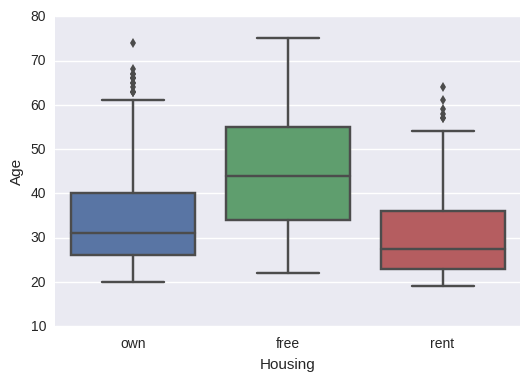

In [10]:
sns.boxplot(x="Housing", y="Age", data=Data);

De acá podemos concluir que la mayoría de las personas entre 20 y 30 viven en arriendo, los que están entre 30 y 40 viven en casa propia y aquellos que viven en casas gratis están entre 35 y 50 con media en 45 aproximadamente.

Ahora combinemos las observaciones con el comportamiento de pago.

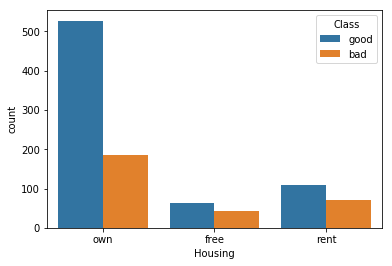

In [7]:
sns.countplot(x="Housing", hue="Class", data=Data);

In [8]:
sns.boxplot(x="Sex", y="Age", hue="Class", data=Data);

Finalmente podemos graficar todas las variables correlacionadas a la vez.

In [9]:
sns.pairplot(Data[['Age','Sex','Job','Housing','Class']],hue='Class')

In [14]:
g = sns.FacetGrid(Data, col="Sex", row = 'Class', size=1.7, aspect=4,)
g.map(sns.distplot, "Age", hist=True, rug=False)

##2. Análisis de Componentes Principales (PCA)

<font size="4">
<p>El análisis de componentes principales es una técnica de reducción de la dimensionalidad en los datos (busca reducir el número de variables con las que se está trabjando conservando la mayor cantidad de información). 
</p>
<p>Es una técnica muy útil como análisis exploratorio de datos cuando se tiene demasiada información. 
</p>
<p>Es util en los siguiente problemas:</p>
<ul>
<li>Reconocimiento de patrones
<li>Determinación 'outliers'
<li>Compresión de imágenes
</ul>

</font>

<font size="4">
<p>Para reducir nuestra información a un espacio de menor dimensionalidad, debemos encontrar las direcciones en las cuales nuestros datos tienen mayor varianza.</p>
<p>Este proceso sigue los siguientes pasos.</p>

<ol>
<li>Estandarizar los datos
<li>Calcular covarianza
<li>Deducir los eigenvectores y eigenvalores
<li>Re-orientar la data (score)
<li>Graficar la data re-orientada.
</ol>

### 1. Estandarizar datos

<font size="4">
<p>Tomemos como ejemplo el dataset iris.</p>
</font>

In [15]:
from sklearn import datasets
iris = datasets.load_iris()

In [16]:
X = iris.data
y = iris.target

In [17]:
print X[0:10], y[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]] [0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
print X_train[0:10], y[0:10]

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]] [0 0 0 0 0 0 0 0 0 0]


### 2 y 3. Calcular covarianza y Deducir Eigens

In [19]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [20]:
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [21]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [22]:
print eigen_vecs

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


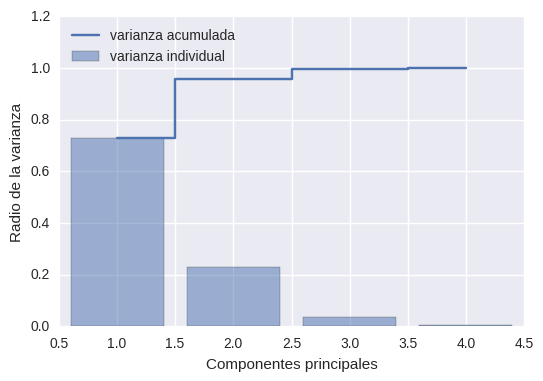

In [23]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,5), var_exp, alpha=0.5, align='center', label='varianza individual')
plt.step(range(1,5), cum_var_exp, where='mid',label='varianza acumulada')
plt.ylabel('Radio de la varianza')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

### 4. Reorientar y graficar la data en el nuevo espacio dimensional

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [25]:
eigen_pairs

[(2.9303537755893192,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734212,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163983,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995596019,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

<font size="4">
<p>Se escogen los 2 eigen-vectores más informativos, los cuales discriminan el más del 80% de la data.</p>
</font>

In [26]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

('Matrix W:\n', array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]]))


In [27]:
x_prima = X_train[0].dot(w)

In [28]:
print 'Trasnformacion del punto:', X_train[0], ', en un espacio de 2 dimensiones: ', x_prima

Trasnformacion del punto: [-0.90068117  1.03205722 -1.3412724  -1.31297673] , en un espacio de 2 dimensiones:  [-2.26454173 -0.5057039 ]


In [29]:
X_train_pca = X_train.dot(w)

In [30]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
labels = ['I. Setosa', 'I. Versicolour', 'I. Virginica']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_train_pca[y==l, 0],
    X_train_pca[y==l, 1],
    c=c, label=labels[l], marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

<font size="4">
<p>Finalmente entrenemos un calsificador 'Logistic Regression' para evaluar que tan buena es la clasificación en el espacio original y el espacio semántico generado.
</p>

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y)
print(logreg.score(X_train, y))

0.926666666667


In [32]:
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y)
print(logreg_pca.score(X_train_pca, y))

0.866666666667


<font size="4">
<p>El score de clasificación es ligeramente menor usando las características iniciales, pero cuando el problema es de mucha más dimensionalidad se hace más relevante no trabajar con todas las características originales.
</p>

#Modulo III - INGENIERIA DE CARACTERÍSTICAS

<BR>

# Taller 1 

<font size="4">
<p> <b>Pregunta 1</b><br>
<p> Analice la correlación que hay entre el propósito del crédito <i>{'radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'}</i> y el resultado de pago <i>{'good', 'bad'}</i>.</p>
</font>

<font size="4">
<p> <b>Pregunta 2</b><br>
<p> Analice la correlación que hay entre el propósito del crédito <i>{'radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'}</i> y la edad y sexo de los aspirantes al crédito.</p>
</font>

<font size="4">
<p> <b>Pregunta 3</b><br>
<p>Transforme las caracteristicas numérica del dataset (german.data-numeric.csv) en un espacio tridimensional que permita clasificar (usando regresion logistica) con por lo menos un 70% de confiabilidad un buen deudor o un mal deudor.</p>
<p><i>Use sklearn.</i></p>
</font>

#Modulo III - QUIZ

<BR>


¿ Cuales es el orden correcto de los pasos para aplicar PCA de manera efectiva ?



# Referencias

* Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
* Press, G. (2013, December 21). A Very Short History Of Big Data. Retrieved July 31, 2017, from https://www.forbes.com/sites/gilpress/2013/05/09/a-very-short-history-of-big-data
* Murphy, K. P. (2013). Machine learning: a probabilistic perspective. Cambridge, Mass.: MIT Press.
* Sugiyama, M. (2016). Introduction to statistical machine learning. Waltham, Ma.: Morgan Kaufmann, Elsevier.